In [61]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [62]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [63]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [64]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [65]:
df_airline.dropna(axis=0,inplace=True)

In [66]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [67]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                      144 non-null object
Thousands of Passengers    144 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [68]:
#Here month is an object time and it should be of date timeobject

In [69]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [70]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                      144 non-null datetime64[ns]
Thousands of Passengers    144 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [71]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [72]:
#set month column as an index
df_airline.set_index('Month',inplace=True)

In [73]:
#now month becomes index
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


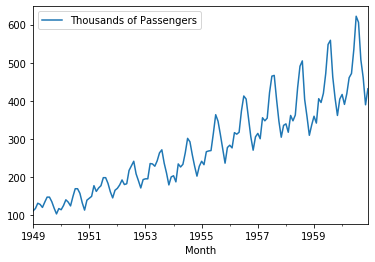

In [74]:
df_airline.plot()
#we can say that this is a seasonal data and it cannot be stationary


In [75]:
from statsmodels.tsa.stattools import adfuller

In [76]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [77]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060457
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [78]:
## Use Techniques Differencing- .shift of one position and differencing by one day
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [79]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [80]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700003
p- value: 0.05421329028382545
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [81]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [82]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468545
p- value: 2.732891850013967e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [83]:
### 12 months as its seasonal data so we will do it for 12 times as seasonal data .
#We dod as sometimes for seasonal arimax may not work well but sarimax may work well
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [84]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924796
p- value: 0.011551493085515008
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [85]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

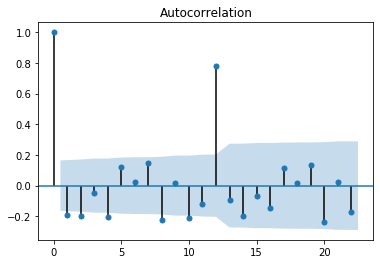

In [86]:
#acf is autocorrelation plot- Suppose this is january(t-2) , Feb(t-1), march(t), in auto correlation and we see how jan
#corerlated with feb and feb is coorelated twith march and how jan correlated with march. All these 
#infonrmations are combined and we use pearson correlation.
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

In [87]:
#here q value =13 since it is from 1 to 13 we can see that there is some seasonality wrt to  12 differencing

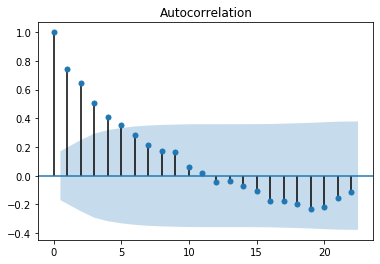

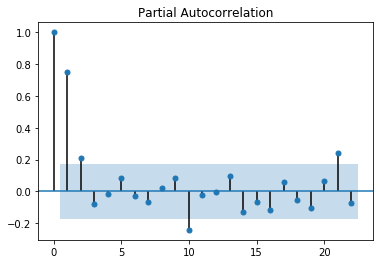

In [88]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())
#Here Here q value =5 and others have not much impact on correlation. I have used 5 seasoal data

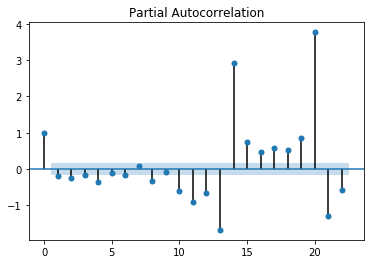

In [89]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())
#Some kind of seasonlity

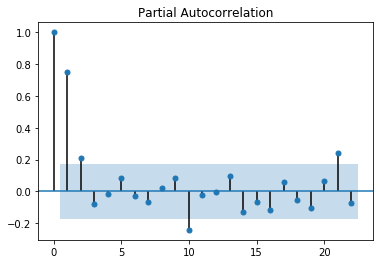

In [90]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())
#here i could see model upto p-2

In [91]:
## split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [92]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [93]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [105]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [106]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [107]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(0,2,0))

C:\Users\Ashish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Ashish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [108]:
model_Arima_fit=model_ARIMA.fit()

In [109]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                         ARIMA(0, 2, 0)   Log Likelihood                -385.782
Method:                                   css   S.D. of innovations             26.728
Date:                        Sun, 03 Apr 2022   AIC                            775.563
Time:                                13:25:52   BIC                            780.377
Sample:                            03-01-1949   HQIC                           777.496
                                 - 12-01-1955                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4268      2.952      0.145      0.885      -5.358       6.212
==============================================================================
"""

In [111]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [99]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [100]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [102]:
pred

1956-01-01    0.426829
1956-02-01    0.426829
1956-03-01    0.426829
1956-04-01    0.426829
1956-05-01    0.426829
1956-06-01    0.426829
1956-07-01    0.426829
1956-08-01    0.426829
1956-09-01    0.426829
1956-10-01    0.426829
1956-11-01    0.426829
1956-12-01    0.426829
1957-01-01    0.426829
1957-02-01    0.426829
1957-03-01    0.426829
1957-04-01    0.426829
1957-05-01    0.426829
1957-06-01    0.426829
1957-07-01    0.426829
1957-08-01    0.426829
1957-09-01    0.426829
1957-10-01    0.426829
1957-11-01    0.426829
1957-12-01    0.426829
1958-01-01    0.426829
1958-02-01    0.426829
1958-03-01    0.426829
1958-04-01    0.426829
1958-05-01    0.426829
1958-06-01    0.426829
1958-07-01    0.426829
1958-08-01    0.426829
1958-09-01    0.426829
1958-10-01    0.426829
1958-11-01    0.426829
1958-12-01    0.426829
1959-01-01    0.426829
1959-02-01    0.426829
1959-03-01    0.426829
1959-04-01    0.426829
1959-05-01    0.426829
1959-06-01    0.426829
1959-07-01    0.426829
1959-08-01 

In [54]:
residuals

Month
1956-01-01    283.573171
1956-02-01    276.573171
1956-03-01    316.573171
1956-04-01    312.573171
1956-05-01    317.573171
1956-06-01    373.573171
1956-07-01    412.573171
1956-08-01    404.573171
1956-09-01    354.573171
1956-10-01    305.573171
1956-11-01    270.573171
1956-12-01    305.573171
1957-01-01    314.573171
1957-02-01    300.573171
1957-03-01    355.573171
1957-04-01    347.573171
1957-05-01    354.573171
1957-06-01    421.573171
1957-07-01    464.573171
1957-08-01    466.573171
1957-09-01    403.573171
1957-10-01    346.573171
1957-11-01    304.573171
1957-12-01    335.573171
1958-01-01    339.573171
1958-02-01    317.573171
1958-03-01    361.573171
1958-04-01    347.573171
1958-05-01    362.573171
1958-06-01    434.573171
1958-07-01    490.573171
1958-08-01    504.573171
1958-09-01    403.573171
1958-10-01    358.573171
1958-11-01    309.573171
1958-12-01    336.573171
1959-01-01    359.573171
1959-02-01    341.573171
1959-03-01    405.573171
1959-04-01    395.5

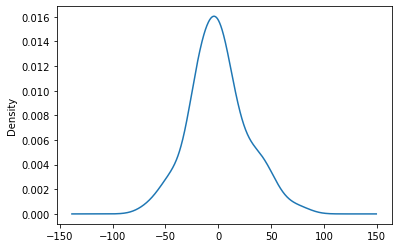

In [55]:
model_Arima_fit.resid.plot(kind='kde')
#Good normal distributed graph 

In [56]:
test_data['Predicted_ARIMA']=pred

C:\Users\Ashish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


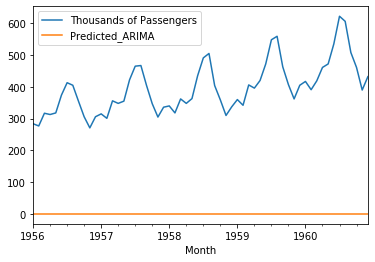

In [58]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

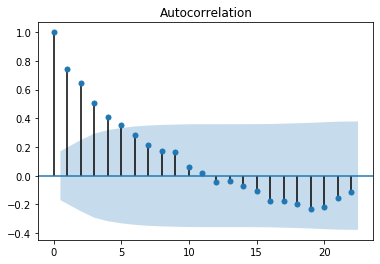

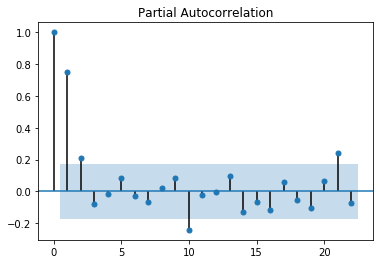

In [112]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())